# Emory's Final Project
##Comparing Pancreas and Thymus data from Tabulia Muris

Sources


1.Danso-Abeam D, Staats KA, Franckaert D, Van Den Bosch L, Liston A, Gray DH D, et al. Aire mediates thymic expression and tolerance of pancreatic antigens via an unconventional transcriptional mechanism. European Journal of Immunology. 2012;43(1):75-84. doi:10.1002/eji.201242761.


2.Throsby M, Homo-Delarche F, Chevenne D, Goya R, Dardenne M, Pleau JM. Pancreatic Hormone Expression in the Murine Thymus: Localization in Dendritic Cells and Macrophages. Endocrinology. 1998;139(5):2399–2406.


3.Fan Y, Rudert WA, Grupillo M, He J, Sisino G, Trucco M. Thymus-specific deletion of insulin induces autoimmune diabetes. The EMBO Journal. 2009;28:2812–2824. doi:10.1038/emboj.2009.212.

In [ ]:
%%bash
# Run this everytime you restart your kernel or relaunch the server
pip install --no-deps scprep
pip install --no-deps umap-learn

In [ ]:
import pandas as pd
import numpy as np
import scprep, umap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Read in the Pancreas counts

## Add the path to this file in the function below

pancreas_data = scprep.io.load_csv("/content/drive/MyDrive/Pancreas-counts.csv", cell_axis='row', sparse=True).transpose()

pancreas_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
B21.MAA000574.3_8_M.1.1,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1072.0,0.0,0.0,0.0,0.0
D12.MAA000574.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B22.MAA000574.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2529.0,0.0,5765.0,0.0,0.0,0.0
D13.MAA000574.3_8_M.1.1,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,23.0,0.0,0.0,0.0
C1.MAA000574.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code shows the first few rows of the Pancreas single-cell RNA seq count matrix. The counts show the expression of each gene in the cell. Transpose makes it so cells become columns and the genes become rows.

In [ ]:
#number of cells and genes

pancreas_data.shape

(1961, 23433)

In [ ]:
#reading in the thymus data and looking at number of cells and genes

thymus_data = scprep.io.load_csv("/content/drive/MyDrive/Thymus-counts.csv",
                           cell_axis='row', sparse=True).transpose()

display(thymus_data.head())
print(thymus_data.shape)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
H6.MAA000607.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I8.MAA000607.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J10.MAA000607.3_9_M.1.1,0.0,147.0,537.0,0.0,0.0,66.0,58.0,0.0,0.0,182.0,...,0.0,1.0,0.0,0.0,0.0,32.0,4.0,0.0,7.0,0.0
K12.MAA000607.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
A17.MAA000607.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1580, 23433)


In [ ]:
## TO DO
## Fill the labels appropriately

data = [pancreas_data , thymus_data ]
batch_labels = ["pancreas","thymus"]

## This combines batches together into a single DataFrame
data, sample_labels = scprep.utils.combine_batches(data, batch_labels)

In [ ]:
data.shape

(3541, 23433)

In [ ]:
data.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)

We know that we have 1961 cells and 23,433 genes in the pancreas data. In the thymus data, we have 1580 cells and 23,433 genes. We combined these two datasets into one matrix using combine_batches(). Our new data is 3541 total cells and still 23,433 genes. We now have a vector as well that tells us what cells came from the pancreas and thymus with the sample_labels. So we have a data matrix, called data that has rows or individual cells from both tissues, columns to hold genes, the values are expression counts and the sample_labels to show the origins for each cell.

#Filtering Metadata for Pancreas and Thymus data

##Filtered cells from 15-19th percentile

##Filter rare genes

##Normalized Library Size

In [ ]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])

# THIS PART WILL NEED TO BE CHANGED TO FILTER FOR PANCREAS AND THYMUS
# WHICH MOUSE AND WHICH TISSUE
#Annotations are the predictions for which type of cell the authors think
metadata = pd.read_csv("/content/drive/MyDrive/metadata_FACS.csv", index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index

metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
B21.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M
D12.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M
B22.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M
D13.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M
C1.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M


This block above makes it so we have a link of the data matrix to the metadata describing each cell describing tissue and subtissue, mouse identification, barcode and FACs selection.

#Filtering Library Size and Gene Capture


<Axes: title={'center': 'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

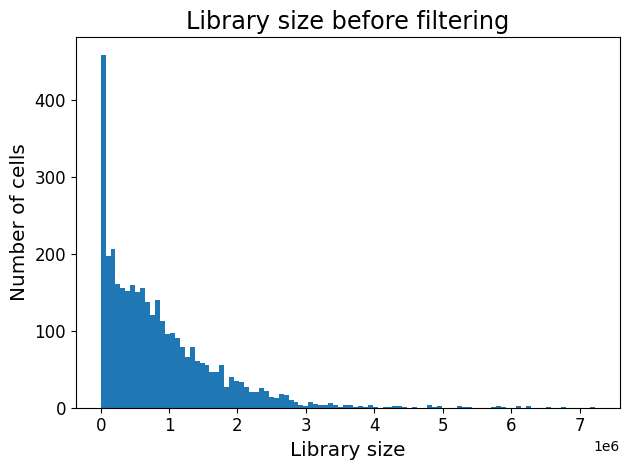

In [ ]:
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering')

This histogram shows the distribution of the library sizes across all cells in the combined dataset we have constructed. Each bar will be a grop of cells with similar total read counts. The tall bars on the left show many cells with very low library sizes. The left side may display a lot of low quality droplets and low RNA content which we may filter out.

<Axes: xlabel='Library size', ylabel='Number of cells'>

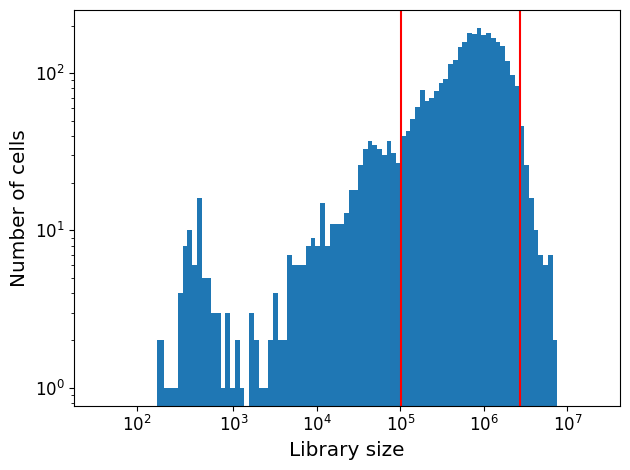

In [ ]:
percentiles = (15,97)

# here we call scprep.plot.plot_library_size again and also view
# where the cutoff for the percentiles that we picked will be

scprep.plot.plot_library_size(data, percentile=percentiles)

This plot will help us find parameters for our library size. We are defining the range of depths we want. I wanted to see if a strict cutoff of 15 to 97 is acceptable, where I am keeeping libararies of only the largest sizes in my filtering.  

In [ ]:
percentiles =  (15, 97)
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)

Also changing this block to be very strict on lower library numbers, (15,97)

This histogram above now measures the number of cells for every gene in which the expression is NOT zero. The genes on the far left are noisy and not useful with our PCA.


<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

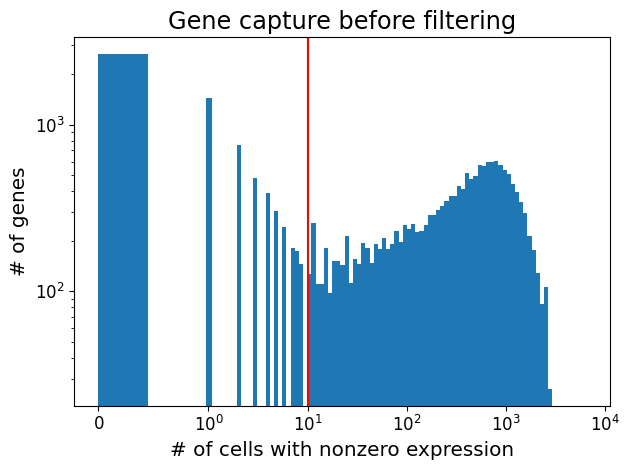

In [ ]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data),
                      cutoff = 10,
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [ ]:
data.shape

(2902, 23433)

In [ ]:
filtered_data = scprep.filter.filter_rare_genes(data.copy(), min_cells=10)

<Axes: title={'center': 'Gene capture after filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

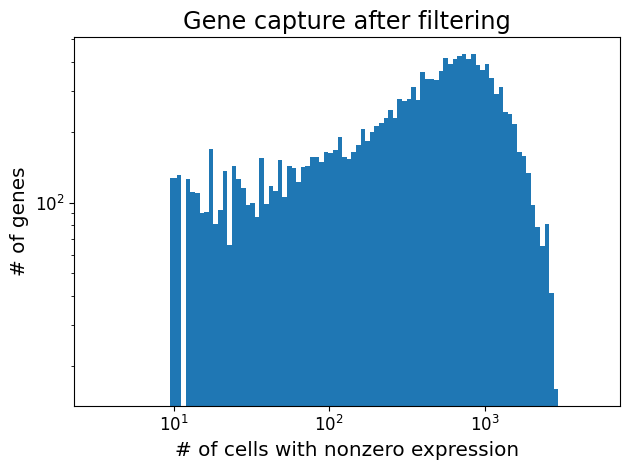

In [ ]:
scprep.plot.histogram(scprep.measure.gene_capture_count(filtered_data), log=True, title="Gene capture after filtering", xlabel="# of cells with nonzero expression", ylabel="# of genes" )

<Axes: title={'center': 'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

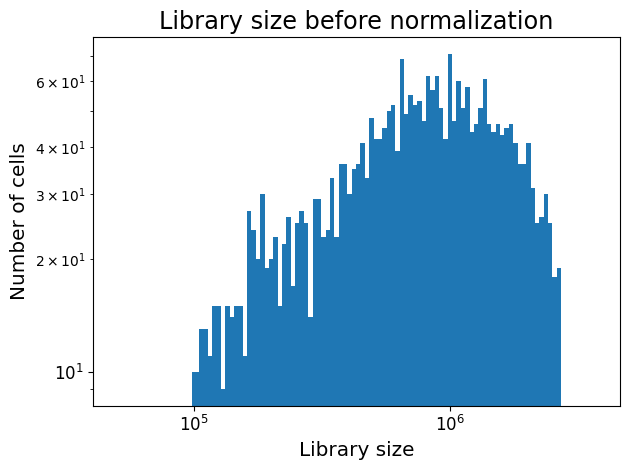

In [ ]:
scprep.plot.plot_library_size(data, title='Library size before normalization')

In [ ]:
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)

<Axes: title={'center': 'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

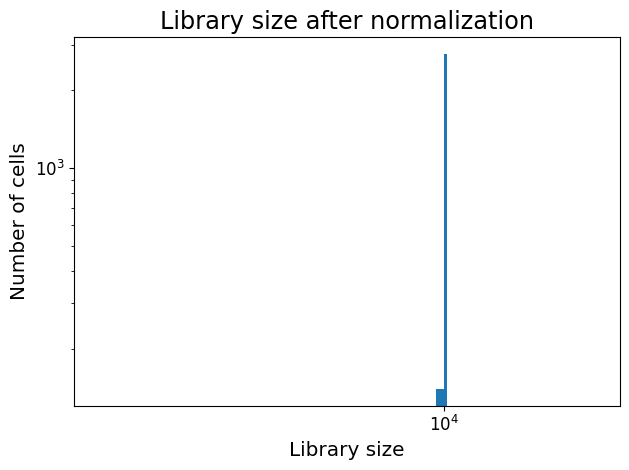

In [ ]:
scprep.plot.plot_library_size(data, title='Library size after normalization')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scprep
%matplotlib inline

import umap
import os

In [ ]:
data.to_pickle("data.pickle.gz")
metadata.to_pickle("metadata.pickle.gz")

In [ ]:
data = pd.read_pickle('data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

#PCA PLOTTING
1.Pancreas vs. Thymus

2.FACS.selection

3.Gene Expression

We want to see if thymus cells gene expression is similar to that of the Pancreas in any way!

In [ ]:
#normalize
data_pca = scprep.reduce.pca(data, n_components=50, method='dense')

In [ ]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
D12.MAA000574.3_8_M.1.1_pancreas,2500.349026,-631.998900,-361.203659,660.494640,578.056301,63.134282,-32.434453,-89.230830,27.207621,-30.153253,...,23.105508,-25.897589,15.166853,65.361696,-89.301825,9.744236,-7.004979,42.021714,-33.355386,-23.359087
D13.MAA000574.3_8_M.1.1_pancreas,2111.968890,-507.682055,-187.841259,-133.892686,-101.678194,-106.631204,-77.775060,-56.196027,31.637028,5.416878,...,-19.519977,1.031521,-13.165255,9.938624,4.954629,11.565807,-2.986449,-1.108873,22.156324,-10.555257
C1.MAA000574.3_8_M.1.1_pancreas,2107.454516,-596.697631,-469.013541,1231.921058,-87.895822,94.921292,-10.614586,-64.574369,46.190052,-39.113906,...,112.640998,-7.692763,5.548574,-0.964880,-24.121457,7.863810,10.987512,-142.962084,9.689258,-4.284377
D14.MAA000574.3_8_M.1.1_pancreas,565.058559,-330.779806,-451.360575,173.411875,1187.359951,44.316325,-13.482234,-38.498674,-21.913050,-11.124089,...,-8.994123,68.637596,-19.389171,-34.149491,21.173518,26.353190,23.569448,-7.898978,-20.248926,-31.819255
C4.MAA000574.3_8_M.1.1_pancreas,2622.769658,-686.139335,-491.184008,1529.177428,-244.664257,122.318729,-9.258535,-47.461901,39.067260,-16.660687,...,-18.418401,-14.802515,0.329212,7.134758,3.948032,9.911701,9.221535,3.101818,7.701476,22.093813


# 1. Fig.A in Report




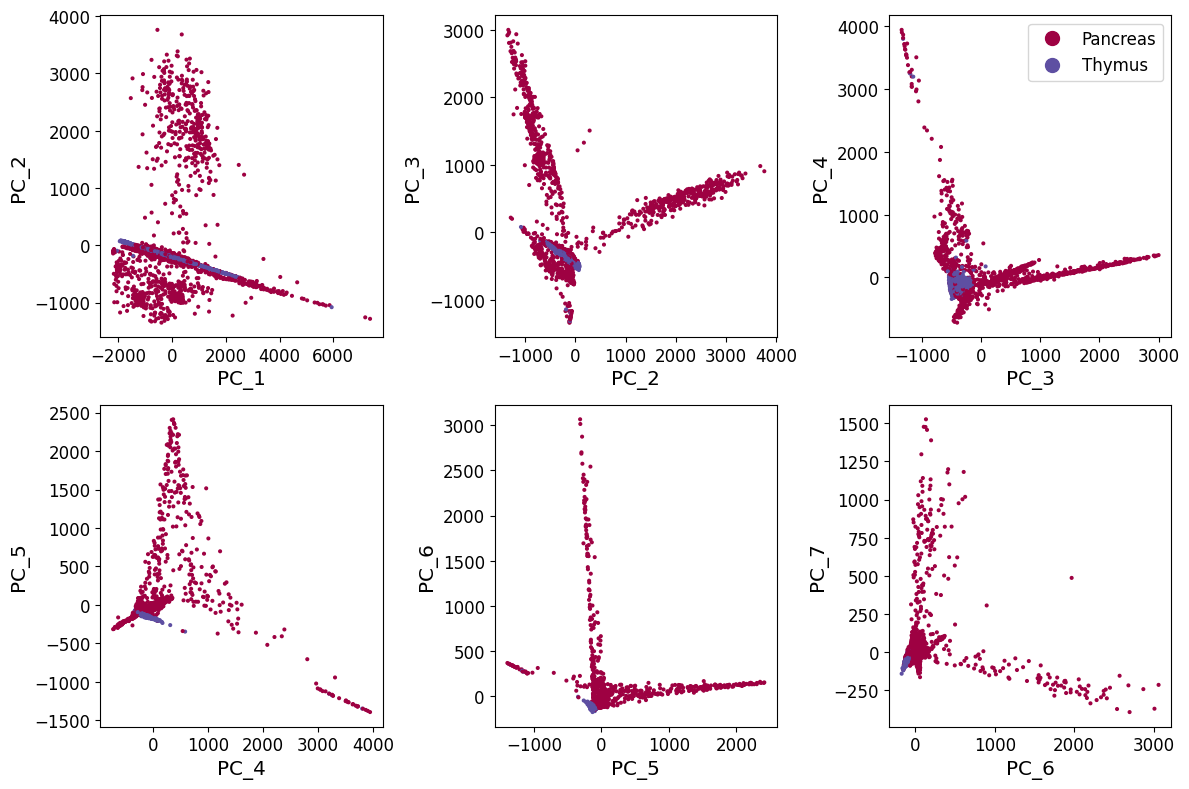

In [ ]:
# TODO
# Let's color our points based on the value in the 'tissue' column in our metadata

# Create a PCA plot like above and color the data based on
# the tissue column of your metadata file

# Hint: You can simply reuse the code we have above, you need to
# change the parameter c, c=metadata[?]

fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['tissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout()

This is where I start to look into particular cells. It is said that Macrophages and Dendritic Cells of the Thymus contain similar genes as to those found in the Pancreas(2).

In [ ]:
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,library_size
D12.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,1141056.0
D13.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,1986620.0
C1.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,526279.0
D14.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,1285240.0
C4.MAA000574.3_8_M.1.1_pancreas,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,901004.0


In [ ]:
metadata.tail()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,library_size
O20.B003291.3_39_F.1.1_thymus,B003291,3_39_F,Thymus,Flowthrough,Multiple,F,251019.0
P22.B003291.3_39_F.1.1_thymus,B003291,3_39_F,Thymus,Flowthrough,Multiple,F,1749496.0
J9.B003291.3_39_F.1.1_thymus,B003291,3_39_F,Thymus,Flowthrough,Multiple,F,641305.0
K11.B003291.3_39_F.1.1_thymus,B003291,3_39_F,Thymus,Flowthrough,Multiple,F,745638.0
L13.B003291.3_39_F.1.1_thymus,B003291,3_39_F,Thymus,Flowthrough,Multiple,F,587878.0


#2.FACS.selection PCA


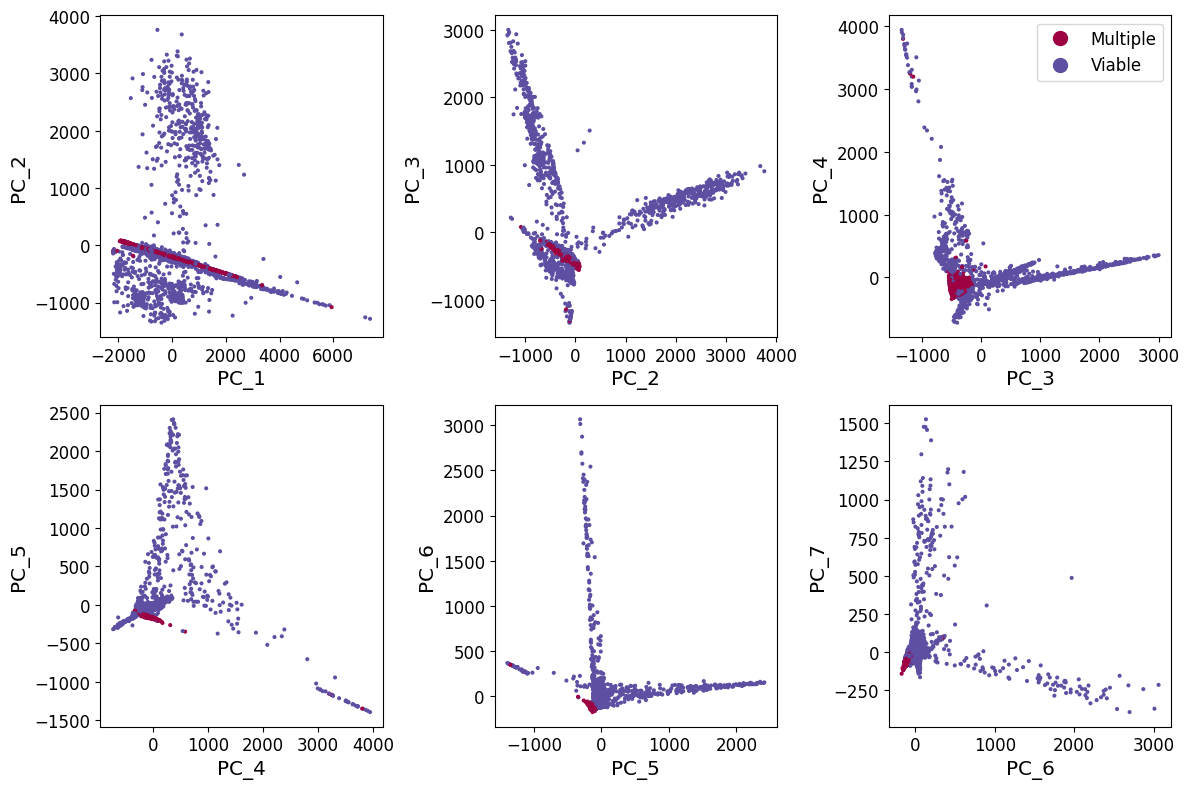

In [ ]:
# TODO
# Let's color our points based on the value in the 'tissue' column in our metadata

# Create a PCA plot like above and color the data based on
# the tissue column of your metadata file

# Hint: You can simply reuse the code we have above, you need to
# change the parameter c, c=metadata[?]

fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['FACS.selection'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout()

These PCA plots were not helpful nor interesting!

In [ ]:
%matplotlib inline

In [ ]:
# Run this cell every time you start working on the notebook
%%bash
pip install --no-deps scprep
pip install --no-deps umap-learn
pip install phenograph
pip install --no-deps tasklogger
pip install graphtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.3 MB/s eta 0:00:00


In [ ]:
# Run this cell every time you start working on the notebook
import pandas as pd
import numpy as np
import scprep, umap
import sklearn
import sklearn.cluster
import sklearn.manifold
import graphtools as gt
import phenograph
import matplotlib.pyplot as plt
import tasklogger

%matplotlib inline

This is reloading and running the PCA.

In [ ]:
with tasklogger.log_task("phenograph"):
    phenograph_clusters, _, _ = phenograph.cluster(data_pca, seed = 42)

Calculating phenograph...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.12911248207092285 seconds
Jaccard graph constructed in 1.3708481788635254 seconds
Wrote graph to binary file in 0.08475351333618164 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.903506
Louvain completed 21 runs in 0.550224781036377 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.3065128326416016 seconds
Calculated phenograph in 2.31 seconds.


#3.Gene Expression PCA

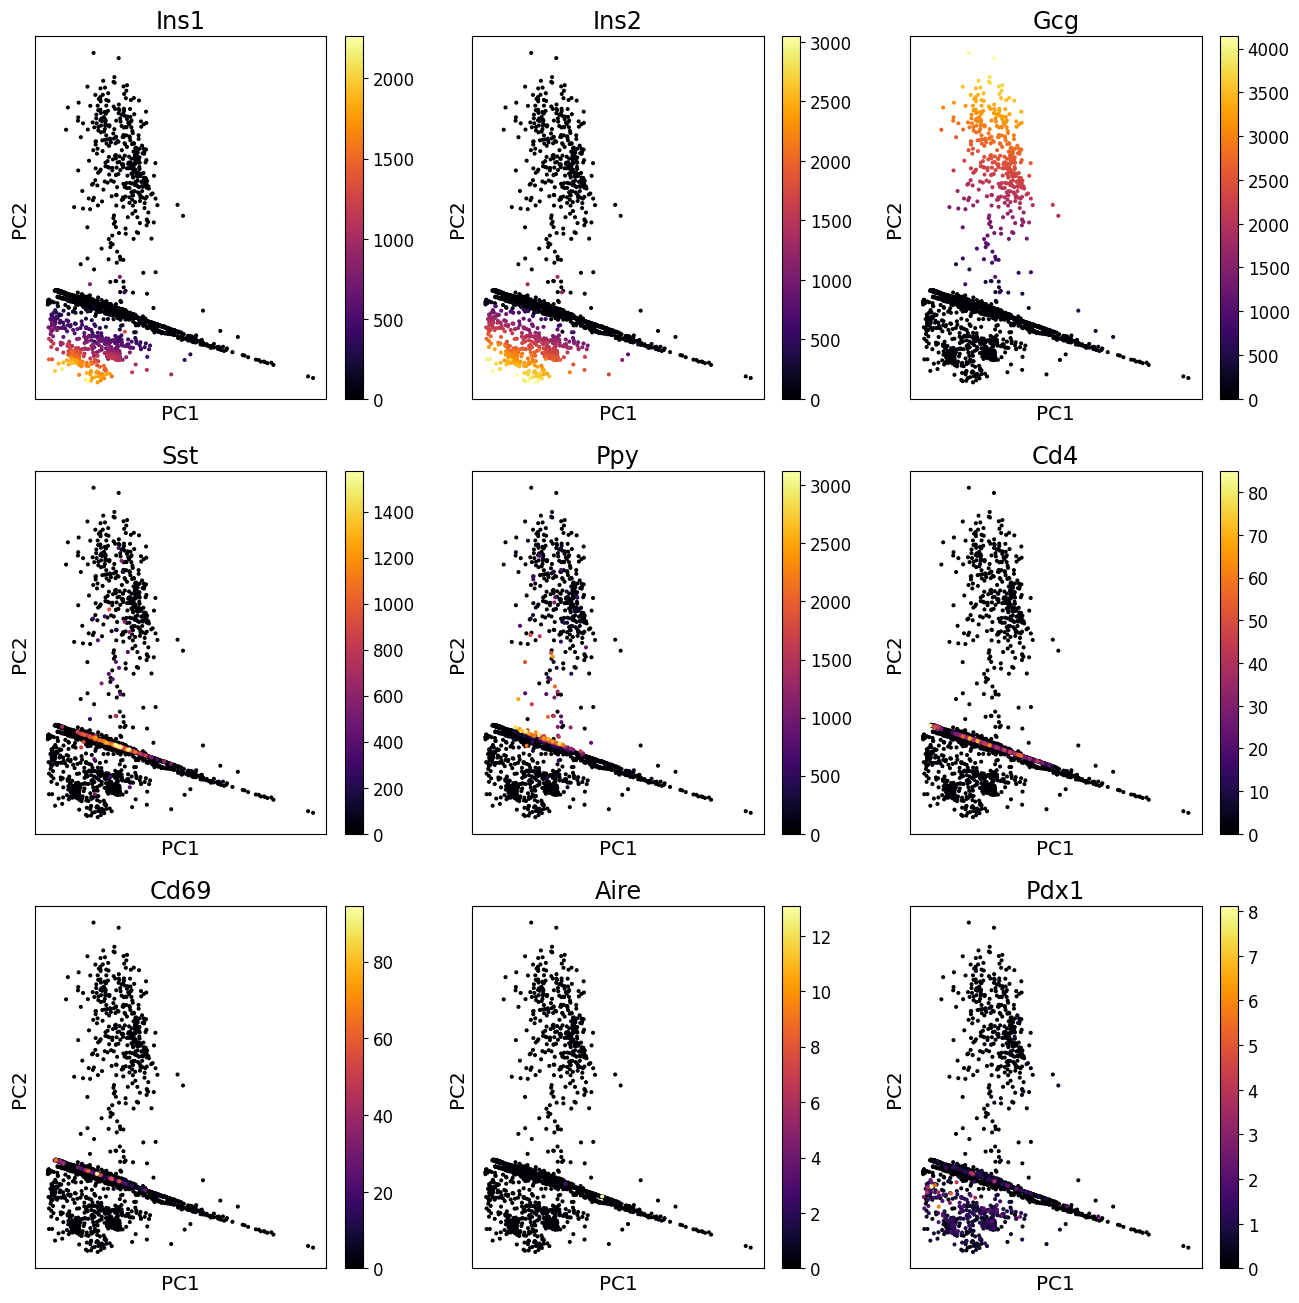

In [ ]:
## TO DO ##

# Make a list of genes
# check the capitalization of your gene names!

gene_list = ["Ins1","Ins2","Gcg","Sst","Ppy","Cd4","Cd69","Aire","Pdx1"]

# Let's look at the dataframe 'data', subsetted to just the genes we've listed above
data[gene_list]

fig, axes = plt.subplots(3,3, figsize=(16,16))

for gene, ax in zip(gene_list, axes.flatten()):
  ## TO DO ##
  expression = scprep.select.select_cols(data, exact_word = gene)

  # we will sort cells by maximum expression so we can see where the gene is expressed
  sort_index = expression.sort_values().index

  scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                       title=gene, ticks=None, label_prefix='PC', ax= ax)

I am looking for the genes that show up on that distinct Thymus "line", and also dissipate into the clusters containing Pancreas cells. I think Pdx1 looks very promising. Ppy and Cd4, as well as Sst are also good candidates for genes that are shared.

#Clustering and UMAP

In [ ]:
with tasklogger.log_task("KMeans"):
    kmeans_clusters = sklearn.cluster.KMeans(n_clusters = 14).fit_predict(data_pca)


Calculating KMeans...
Calculated KMeans in 0.09 seconds.


In [ ]:
clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters}

for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_pca.iloc[:,0])
    clusterings[alg] = cl_nu

In [ ]:
import umap.umap_ as umap
data_umap = umap.UMAP(random_state= 42).fit_transform(data_pca.iloc[:,:50])

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
data_umap = pd.DataFrame(data_umap, index = data.index)

In [ ]:
clusters = clusterings['Phenograph']

#Figure B in Report (Fig. B)

<Axes: title={'center': 'UMAP colored by Phenograph Clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

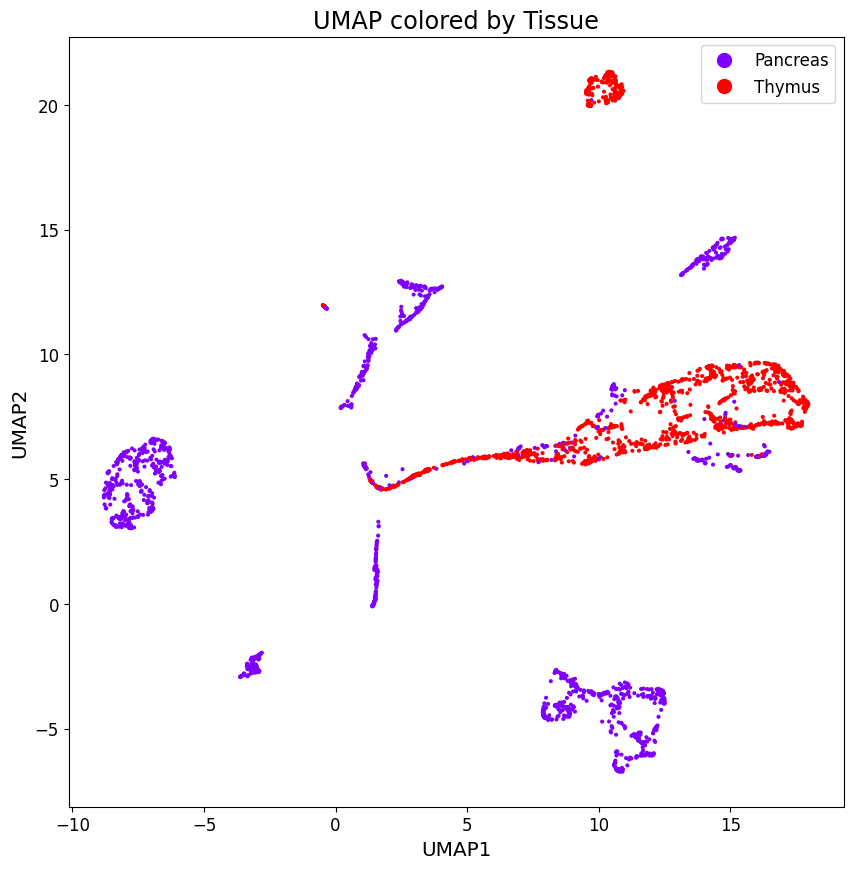

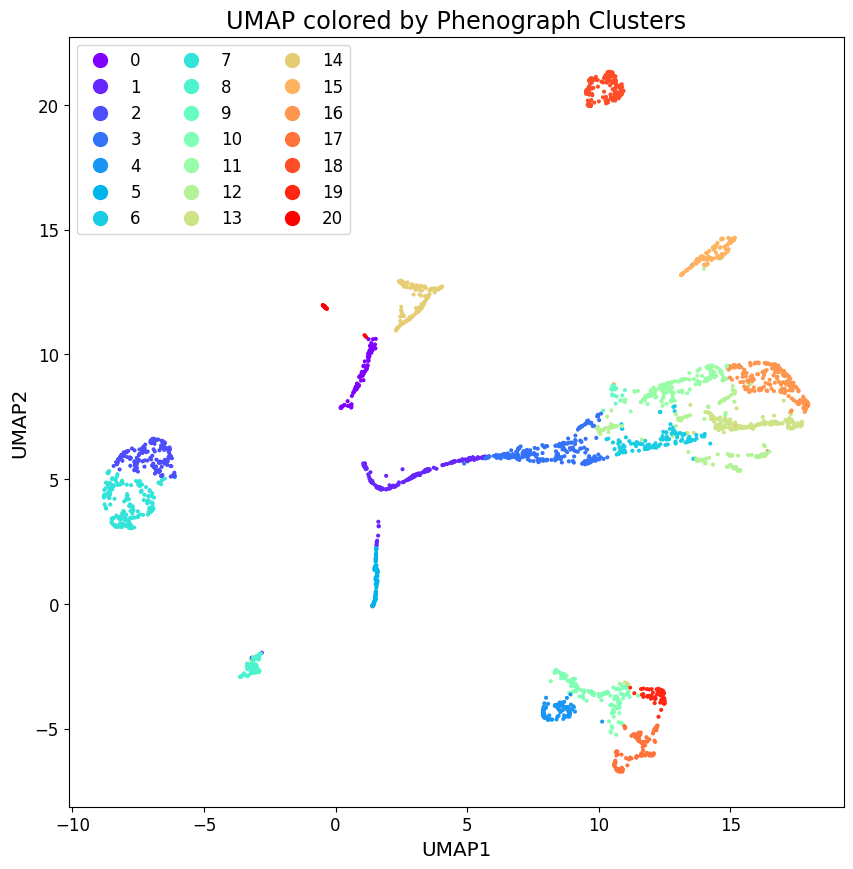

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

scprep.plot.scatter2d(
  data_umap, c=metadata['tissue'], cmap=plt.cm.rainbow, discrete=True,
  ax=ax,
  label_prefix="UMAP",
  title="UMAP colored by Tissue")

fig, ax = plt.subplots(figsize=(10,10))

# To color by Phenograph clusters, set `c=clusters` and use a discrete colormap.
scprep.plot.scatter2d(
  data_umap, c=clusters, cmap=plt.cm.rainbow, discrete=True,
  ax=ax,
  label_prefix="UMAP",
  title="UMAP colored by Phenograph Clusters")


UMAP is heling me solidifty my cluster findings from the PCA plots. I am seeing that cluster 13 could have a mix of either cells in the data. I call the middle structure the whale. That specifically has a lot of clusters that I find would share the expression of the specific genes we're looking at. I see 3 or 4, 8, and 13 sharing that middle structure specifically.

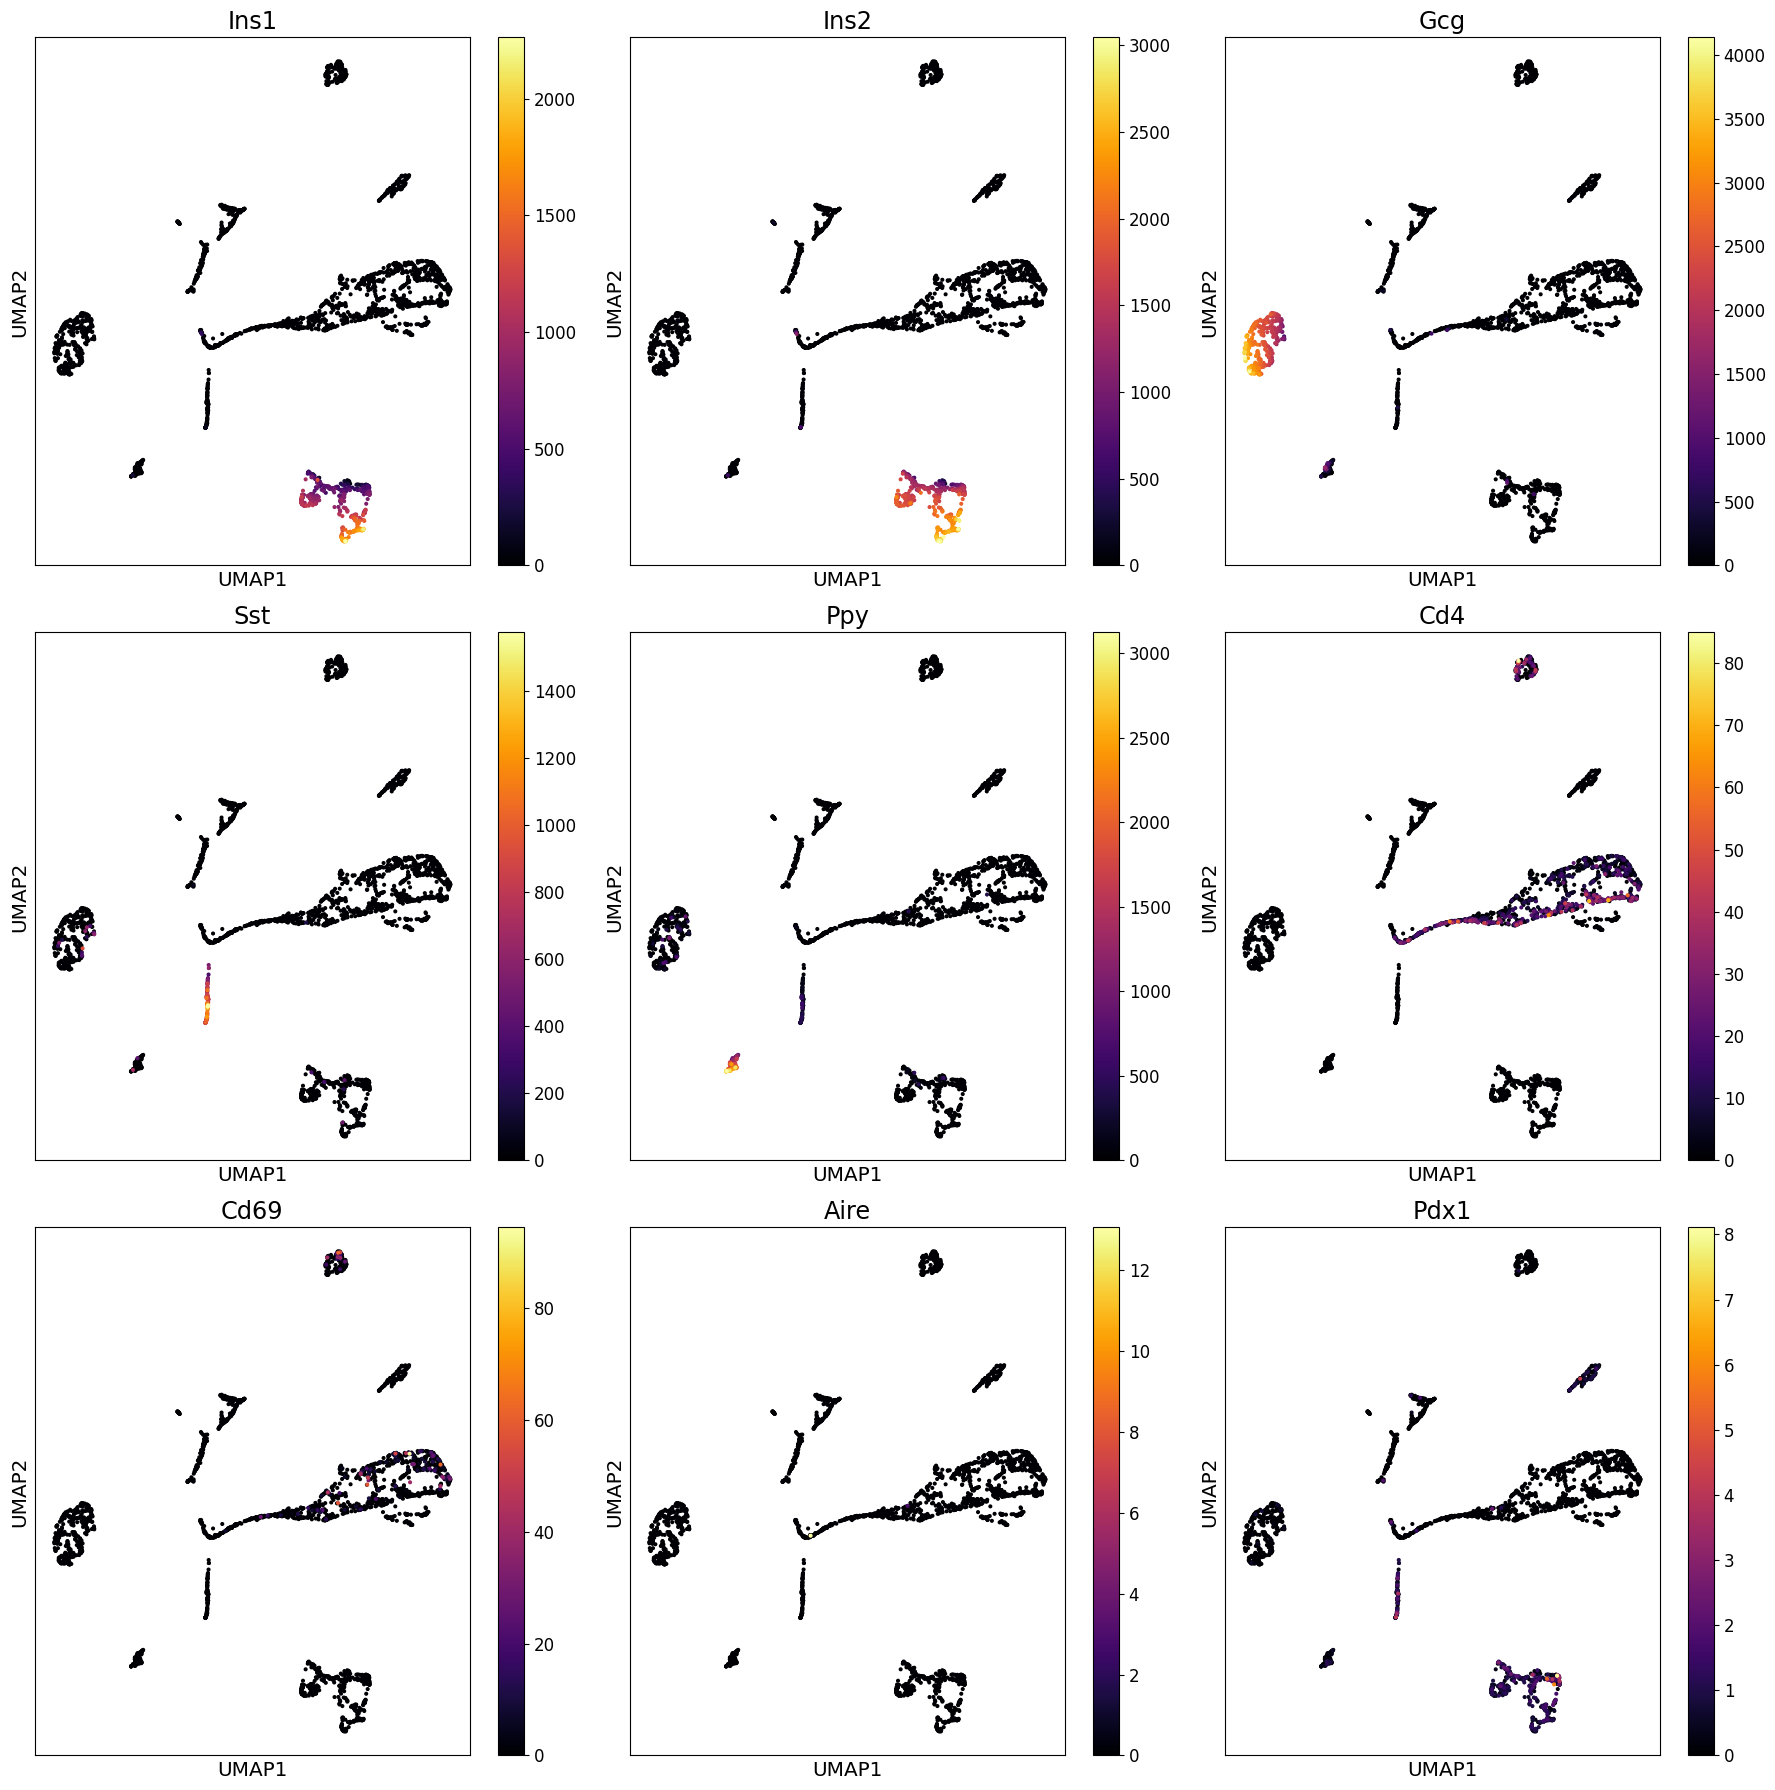

In [ ]:
gene_list = ["Ins1","Ins2","Gcg","Sst","Ppy","Cd4","Cd69","Aire","Pdx1"]

fig, axes = plt.subplots(3,3, figsize=(18,18))

for gene, ax in zip(gene_list, axes.flatten()):
  expression = scprep.select.select_cols(data, exact_word = gene)

  # we will sort cells by maximum expression so we can see where the gene is expressed
  sort_index = expression.sort_values().index

  scprep.plot.scatter2d(data_umap.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                       title=gene, ticks=None, label_prefix='UMAP', ax= ax)
fig.tight_layout()

This way of lookin at gene expression is not helpful at all and very hard to interpret with UMAPS of these particular tissues.

<Axes: title={'center': 'UMAP colored by Tissue'}, xlabel='UMAP1', ylabel='UMAP2'>

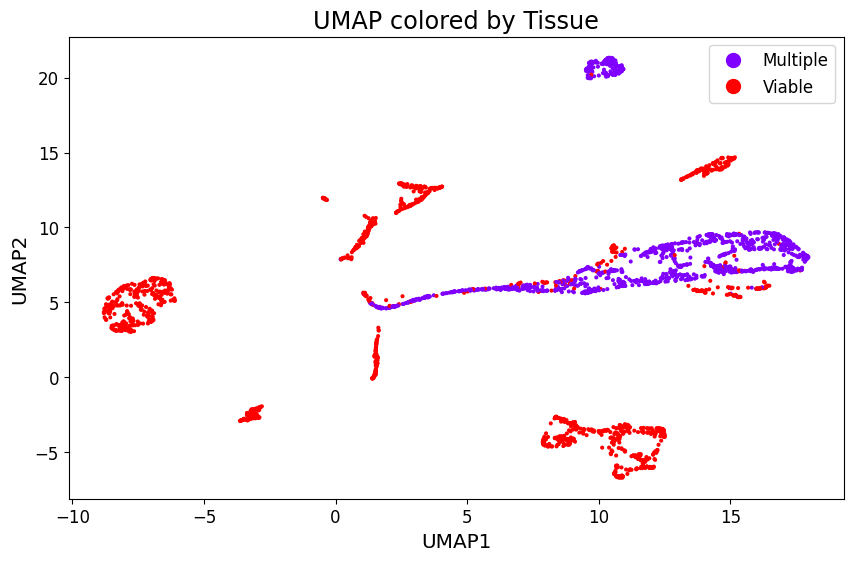

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

scprep.plot.scatter2d(
  data_umap, c=metadata['FACS.selection'], cmap=plt.cm.rainbow, discrete=True,
  ax=ax,
  label_prefix="UMAP",
  title="UMAP colored by Tissue")


All Thymus data is assigned 'Multiple' for it's FACS.selection of the Tabula Muris data.

<Axes: title={'center': 'Phenograph - (2)'}, xlabel='PCA1', ylabel='PCA2'>

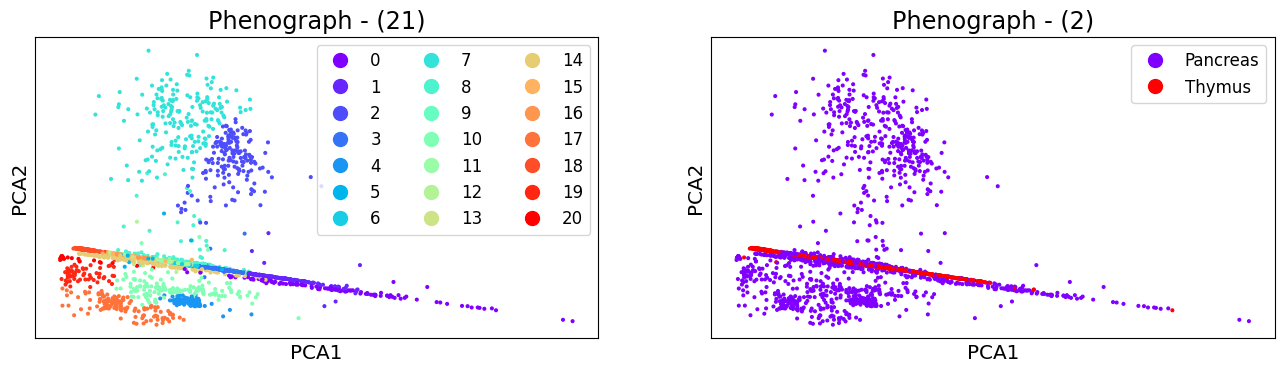

In [ ]:
# We will look at the low dimensional representation of our cells, coloured both by cluster number and their
# Changed FACS.selection to tissue

fig, axes = plt.subplots(1,2, figsize=(16,16), subplot_kw={'aspect':'equal'})

# TODO:
scprep.plot.scatter2d(data_pca, c=clusters, cmap=plt.cm.rainbow,
                        # TO DO -- write the name of your algorithm
                      title='{} - ({})'.format('Phenograph', len(np.unique(clusters))),
                      ticks=False, label_prefix="PCA", legend=True, discrete=True,
                      ax=axes[0])

## TO DO -- set c so that you can color by cell types ('FACS.selection') instead of the clusters
# Hint: What dataframe has your metadata?
# How can you access the 'FACS.selection' column of the metadata dataframe?

scprep.plot.scatter2d(data_pca, c=metadata['tissue'], cmap=plt.cm.rainbow,
                        # TO DO -- write the name of your algorithm
                      title='{} - ({})'.format('Phenograph', len(np.unique(metadata['tissue']))),
                      ticks=False, label_prefix="PCA", legend=True, discrete=True,
                      ax=axes[1])

From this image, I can see that maybe the clusters of interest should be ones that are found on this line that defines the thymus in our PCA plot, and also dissipates into the space above and below this line.I will rely on the UMAP clustering to form any suggestions.

#Jitter Plots of Significant Genes


I took genes of significance from this literature and will use them to see where they are expressed within the cells of the mice used in this data.

<Axes: title={'center': 'Pdx1'}, ylabel='Pdx1'>

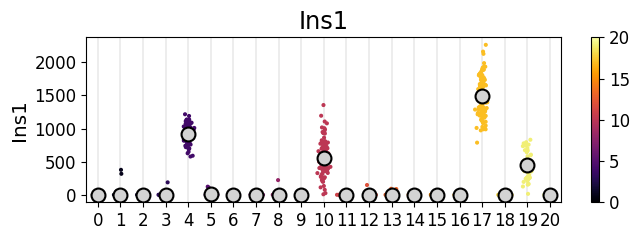

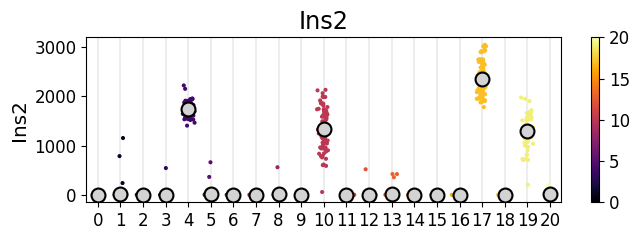

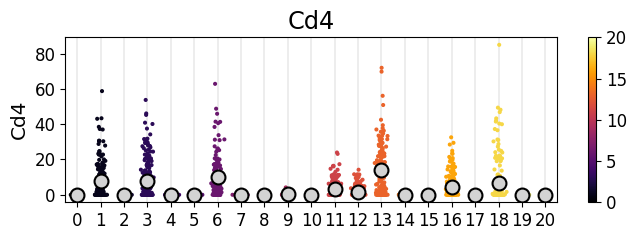

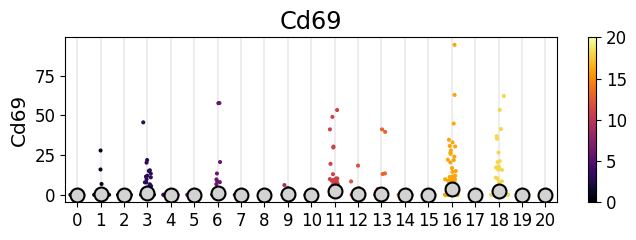

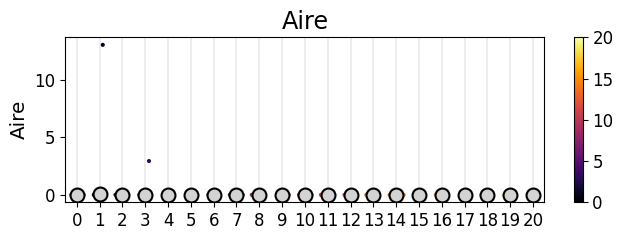

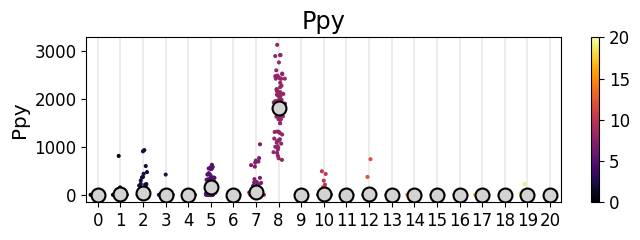

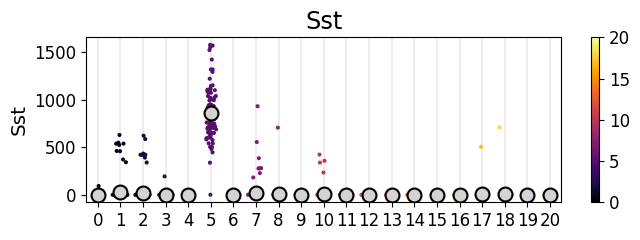

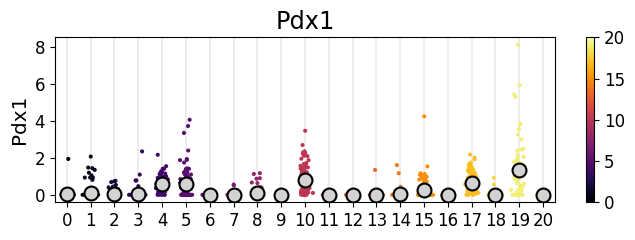

In [ ]:
curr_gene = 'Ins1'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Ins2'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Cd4'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Cd69'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Aire'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Ppy'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Sst'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)
curr_gene = 'Pdx1'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(7, 2.5),
                   legend_anchor=(1,1), title=curr_gene)


#Raw data
This is how I've pieced together my more suggestive data. Cluster 0,1,3,6,9,11,12,13,18,and 20 all share parts of clusters.

In [ ]:
metadata['tissue'].groupby(clusters).value_counts(normalize=True)

tissue  
0   Pancreas    0.982609
    Thymus      0.017391
1   Thymus      0.725275
    Pancreas    0.274725
2   Pancreas    1.000000
3   Thymus      0.855469
    Pancreas    0.144531
4   Pancreas    1.000000
5   Pancreas    1.000000
6   Thymus      0.977273
    Pancreas    0.022727
7   Pancreas    1.000000
8   Pancreas    1.000000
9   Pancreas    0.965517
    Thymus      0.034483
10  Pancreas    1.000000
11  Thymus      0.987261
    Pancreas    0.012739
12  Pancreas    0.505682
    Thymus      0.494318
13  Thymus      0.952663
    Pancreas    0.047337
14  Pancreas    1.000000
15  Pancreas    1.000000
16  Thymus      0.990909
    Pancreas    0.009091
17  Pancreas    1.000000
18  Thymus      0.985149
    Pancreas    0.014851
19  Pancreas    1.000000
20  Pancreas    0.909091
    Thymus      0.090909
Name: proportion, dtype: float64

11/20 Clusters share cells from both tissue types in their clusters.

In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 1
one_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

one_top_genes = one_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

one_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Rn45s,47.041345
Ddc,19.535048
Chga,19.118126
Gcg,18.437672
Ccnd2,18.113050
Ins1,17.659579
Ins2,17.413609
Iapp,17.351257
Sod1,17.200945
Slc2a5,17.194646


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 3
thr_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

thr_top_genes = thr_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

thr_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Rn45s,29.871468
2310015B20Rik,22.918396
Slc30a8,22.562034
Isl1,21.972074
Tmem27,21.657681
Prune2,21.305752
Ins2,21.024720
Scg2,20.438715
Pak3,20.335500
Chic1,20.319468


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 7
sev_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

sev_top_genes = sev_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

sev_top_genes.head(n=20)


/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Gcg,67.848831
Coro1a,37.004962
Laptm5,35.962059
Arhgdib,35.713827
Lck,35.675271
Cst3,35.485732
Pfn1,34.938604
Actb,34.616952
Cd3d,32.746758
Ptprcap,32.652890


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


te_cluster = 10
te_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

te_top_genes = te_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

te_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Gcg,67.848831
Coro1a,37.004962
Laptm5,35.962059
Arhgdib,35.713827
Lck,35.675271
Cst3,35.485732
Pfn1,34.938604
Actb,34.616952
Cd3d,32.746758
Ptprcap,32.652890


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 11
el_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

el_top_genes = el_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

el_top_genes.head(n=30)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Cpe,34.247052
Scg3,33.112587
Pcsk2,32.983356
Scg5,31.947353
Syt13,30.729188
Scgn,30.373317
Maged1,29.936665
Chga,29.360553
Pcbd1,29.257576
Scg2,28.760777


#Fig. C in Report

In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 12
tw_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

tw_top_genes = tw_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

tw_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Iapp,22.992877
Neurod1,22.511080
Scg2,20.639828
Ins2,20.616285
Chgb,20.343853
Scg3,20.073418
Gcg,19.490318
Ins1,19.209293
Isl1,18.441107
Pdx1,18.166499


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


curr_cluster = 13
thirt_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

thirt_top_genes = thirt_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

thirt_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Ccnd2,31.133827
Scg5,30.520717
Selm,30.140500
Resp18,28.007402
Scgn,27.869071
Scg3,27.454724
Aplp1,27.348850
Tmem27,26.785248
Pcsk2,25.883584
2310015B20Rik,25.539051


In [ ]:
data_sparse = scprep.utils.SparseDataFrame(data)


sevt_cluster = 17
sevt_ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

sevt_top_genes = sevt_ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

sevt_top_genes.head(n=20)

/usr/local/lib/python3.12/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in divide
  return mean_difference(X, Y) / paired_std


,ttest
Ccnd2,31.133827
Scg5,30.520717
Selm,30.140500
Resp18,28.007402
Scgn,27.869071
Scg3,27.454724
Aplp1,27.348850
Tmem27,26.785248
Pcsk2,25.883584
2310015B20Rik,25.539051


#Thank you !
All user error messages were taken into consideration, and ignored as they were not going to skew data.